In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('pokemon_data.csv')

# DATA OVERVIEW

In [3]:
df.shape

(800, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.columns = df.columns.str.upper().str.replace(' ','') # Data renaming for convenience
df.head()

,#,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
df[df['LEGENDARY'] == True].head(5) # Data filteration

,#,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True


In [8]:
df['MEGA'] = df.NAME.str.contains('Mega') # Creating extra column MEGA for Mega Pokemons

In [9]:
import re
df.NAME = df.NAME.apply(lambda x: re.sub(r'.*(?=Mega)','',x)) # Substitute Mega words and replacing them

In [10]:
df.head(20)

,#,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,False
7,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,True
8,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,True
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,False


In [11]:
df.drop('#',axis=1, inplace=True)

In [12]:
df.head(10)

,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,False
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,False
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,True
8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,True
9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,False


In [13]:
df.TYPE2.fillna(df['TYPE1'],inplace=True)

In [14]:
df.TYPE2.isna().sum()

0

In [15]:
df.set_index('NAME')

,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
Charmander,Fire,Fire,39,52,43,60,50,65,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,False
Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,True
HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,False


In [42]:
df[((df['TYPE1']=='Fire') | (df['TYPE1'] == 'Dragon')) & ((df['TYPE2'] == 'Dragon') | (df['TYPE2'] == 'Fairy'))]

,NAME,TYPE1,TYPE2,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,MEGA
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,True
159,Dratini,Dragon,Dragon,41,64,45,50,50,50,1,False,False
160,Dragonair,Dragon,Dragon,61,84,65,70,70,70,1,False,False
366,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False,True
406,Bagon,Dragon,Dragon,45,75,60,40,30,50,3,False,False
407,Shelgon,Dragon,Dragon,65,95,100,60,50,50,3,False,False
671,Axew,Dragon,Dragon,46,87,60,30,40,57,5,False,False
672,Fraxure,Dragon,Dragon,66,117,70,40,50,67,5,False,False
673,Haxorus,Dragon,Dragon,76,147,90,60,70,97,5,False,False
682,Druddigon,Dragon,Dragon,77,120,90,60,90,48,5,False,False


In [58]:
print("Maximum HP at row:",df['HP'].argmax()) # argmax() tells the positional value of max
print("Maximum HP:",df['HP'].max())# Tells the max values

Maximum HP at row: 261
Maximum HP: 255


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [64]:
print("The unique Pokemon types are", df['TYPE1'].unique())
print("\nThe number of unique Pokemon types are", df['TYPE1'].nunique())

The unique Pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

The number of unique Pokemon types are 18


In [72]:
df['TYPE1'].value_counts() # Value Counts for each variable
df.groupby(['TYPE1']).size() # Same as above
(df['TYPE1'] == 'Bug').sum() # Total values for given condition

69

In [74]:
df.describe() #Summary of the DataFrame

,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# VISUALISATIONS

### Distribution of Attack attribute among all generations

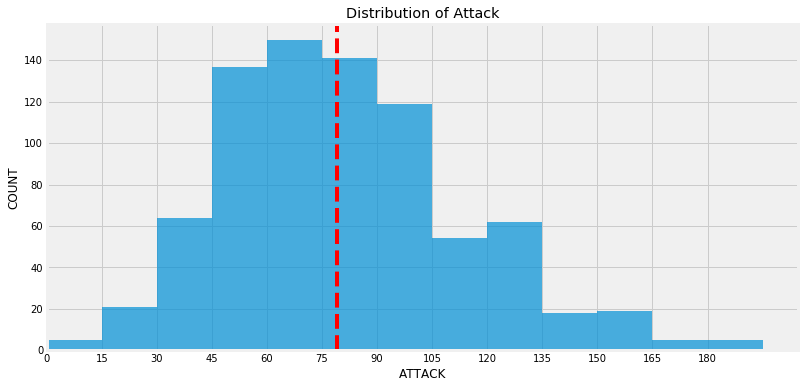

In [160]:
bins = range(0,200,15) # Useful for hisotgram distribution
fig = plt.figure(figsize=(12,6))
plt.title('Distribution of Attack')
plt.hist(df['ATTACK'],bins=bins,rwidth=1.1,alpha=0.7,align='mid')
plt.xlim(0)
plt.xticks(np.arange(0,190,15))
plt.xlabel('ATTACK')
plt.ylabel('COUNT')
plt.axvline(df['ATTACK'].mean(),linestyle='dashed',color='red')
plt.show()
# fig.show()

### Fire vs Water - Scatter Plot

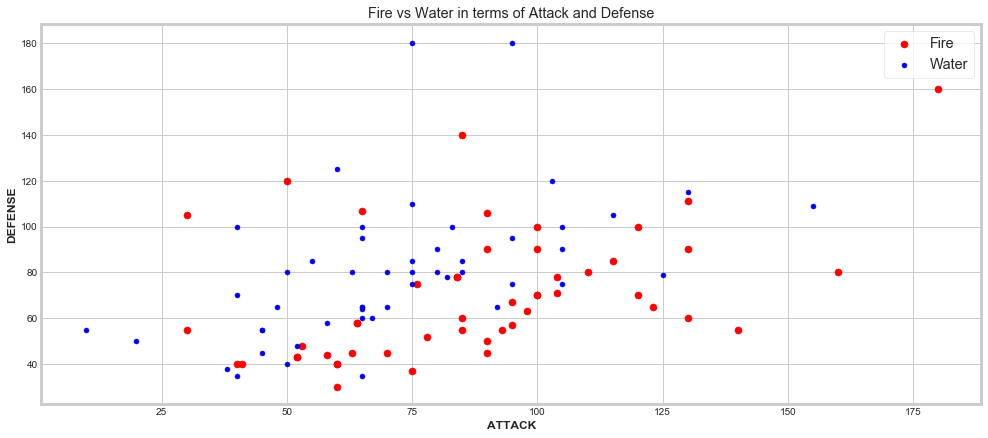

In [219]:
sns.set_style('whitegrid')
font = {'size':'large', 'weight':'bold'}

fire = df[(df['TYPE1'] == 'Fire') | (df['TYPE2'] == 'Fire')] #Fire attr
water = df[(df['TYPE1'] == 'Water') | (df['TYPE2'] == 'Water')] #Water attr
fvw = plt.figure(figsize=(15,7))
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),c='r',s=50,label='Fire')
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),c='b',s=25,label='Water')
plt.xlabel('ATTACK',fontdict=font)
plt.ylabel('DEFENSE',fontdict=font)
plt.title('Fire vs Water in terms of Attack and Defense')
plt.legend(loc='upper right',fontsize='x-large')
plt.show()